## Temat 1. Własna sieć neuronowa
Celem projektu jest samodzielne zaimplementowanie prostej sieci neuronowej i przetestowanie jej na wybranym przez siebie przykładzie.

Podstawowym założeniem projektu jest własnoręczne zaimplementowanie automatycznego różniczkowania w celu wyznaczania pochodnych warstw potrzebnych do wstecznej   propagacji błędów. Dopuszczalne jest wykorzystanie różniczkowanie w przód (ang. Forward Accumulation), różniczkowanie w tył (ang. Reverse Accumulation) oraz różniczkowanie oparte o generację kodu (ang. source-to-source differentiation).

Do implementacji optymalizatorów dokonujących właściwego uczenia sieci można wykorzystać kod zamieszczony w książce "Algorithms for Optimization" [1].

klasyfikacja cyfr (Digits MNIST dataset)  
Bibliografia:  
[1] Mykel J. Kochenderfer, Tim A. Wheeler, 2019, Algorithms for Optimization, MIT Press.  
[2] Martin T. Hagan et. al, Neural Network Design, pp. 915-918, url: https://hagan.okstate.edu/NNDesign.pdf  
[3] 3blue1brown: czym są sieci neuronowe? https://www.youtube.com/watch?v=aircAruvnKk  
  


In [156]:
using Pkg
#Pkg.activate("./project")

In [157]:
Pkg.add("MLDatasets")
Pkg.add("IJulia")
Pkg.add("StableRNGs")
Pkg.add("DataFrames")
Pkg.add("PyPlot")
using Plots
ENV["PYTHON"] = ""

   Resolving package versions...

  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\parzy\.julia\environments\v1.7\Manifest.toml`


""

# Load Dataset

In [1]:
using RDatasets
using Random

include("utils/DataLoader.jl")
include("Lib/CustomDiffLib.jl")
include("utils/NetFunctions.jl")

X_train, y_train, X_test, y_test, classes  = getPrepearedData("datasets", "iris")

LoadError: SystemError: opening file "e:\\Documents\\1. Studia\\MAGISTERSKIE\\Algorytmy w inż danych\\Custom-Julia-NN\\DataLoader.jl": No such file or directory

### Working net

In [168]:
Random.seed!(2)
mean_squared_loss(y::BitVector, ŷ::Vector) = sum(0.5(y - ŷ) .^ 2)
fullyconnected(w::Vector, n::Number, m::Number, v::Vector, activation::Function) = activation.(reshape(w, n, m) * v)
σ(x) = one(x) / (one(x) + exp(-x))

function foward(x, wh, wo, y)
    x̂ = fullyconnected(wh, 4, 4, x, ReLU)
    ŷ = fullyconnected(wo, 3, 4, x̂, σ)
end

function net(x, wh, wo, y)
    x̂ = fullyconnected(wh, 4, 4, x, ReLU)
    ŷ = fullyconnected(wo, 3, 4, x̂, σ)
    E = mean_squared_loss(y, ŷ)
end

InitializeNet() =  randn(4, 4), randn(3, 4), randn(4, 4), randn(3, 4)

function train(epochs::Int, lr::Float64, X_data, y_data)
    X_data = X_train
    y_data = y_data
    Wh, Wo, dWh, dWo = InitializeNet()
    # Loss, accuracy tracking while net is training
    Loss_history = Float64[]
    Accuracy_history = Float64[]
    
    for epoch = 1:epochs
        epoch_L = []
        for i in 1:size(X_train)[2]
            x = X_train[:, i]
            y = y_data[:, i]
            L = net(x, Wh[:], Wo[:], y)
            dnet_Wh(x, wh, wo, y) = J(w -> net(x, w, wo, y), wh)
            dWh[:] = dnet_Wh(x, Wh[:], Wo[:], y)
            dnet_Wo(x, wh, wo, y) = J(w -> net(x, wh, w, y), wo)
            dWo[:] = dnet_Wo(x, Wh[:], Wo[:], y)
   
            push!(epoch_L, L)
            acc = foward(x, Wh[:], Wo[:], y)
            Wh -= lr * Wh
            Wo -= lr * dWo
        end
        push!(Loss_history, std(epoch_L))
    end
    return Loss_history
end

train (generic function with 1 method)

  1.156687 seconds (1.74 M allocations: 105.650 MiB, 5.86% gc time, 94.03% compilation time)


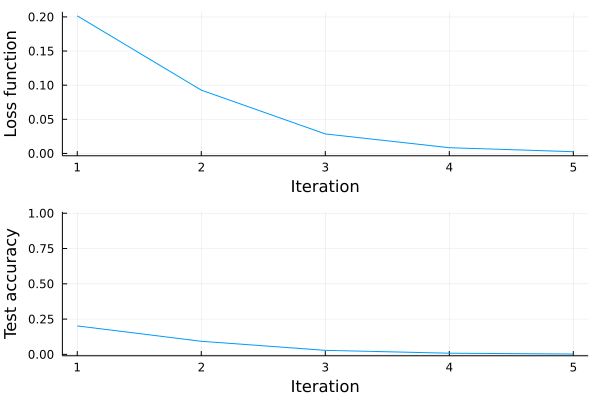

In [170]:
Random.seed!(2)
@time history = train(5, 0.01, X_train, y_train)
p1 = plot(history, xlabel="Iteration", ylabel="Loss function", label="")
p2 = plot(history, xlabel="Iteration", ylabel="Test accuracy", label="", ylim=(-0.01, 1.01))
plot(p1, p2, layout=(2, 1))


## Plots

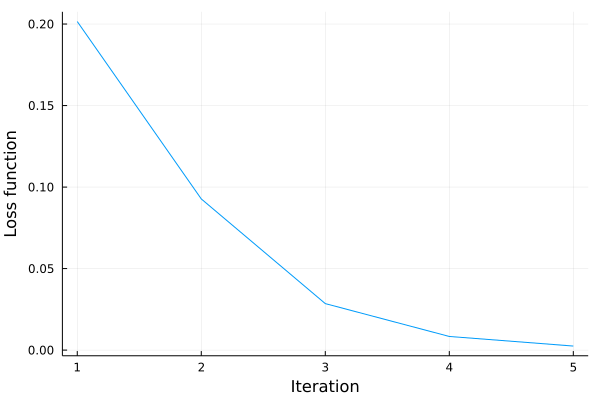

In [171]:
plot(history, xlabel="Iteration", ylabel="Loss function", label="")